In [1]:
## Imoorting relevant libraries ##

import numpy as np                ## for mathematical operations on arrays
import pandas as pd               ## for dataframe operations
import matplotlib.pyplot as plt   ## for plotting
import seaborn as sns             ## for plotting

%matplotlib inline

In [2]:
data = pd.read_csv('facebook_user_data.csv')    ## reading csv file

In [3]:
data.head()    

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
data.shape     ## checking no. of rows and columns

(99003, 15)

In [5]:
print(data.nunique())        ## checking number of unique conuts in every column
print('*********************************************')
print(data.isnull().sum())   ## checking null values if present in every column
print('*********************************************')
print(data.dtypes)           ## checking data type of every column

userid                   99003
age                        101
dob_day                     31
dob_year                   101
dob_month                   12
gender                       2
tenure                    2426
friend_count              2562
friendships_initiated     1519
likes                     2924
likes_received            2681
mobile_likes              2396
mobile_likes_received     2004
www_likes                 1726
www_likes_received        1636
dtype: int64
*********************************************
userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64
****************************

# 1) Load the data and impute missing values Imputation of missing values:

           
● Replace the null values (NA) of gender column with its mode or median and explain
why mode/median used to replace NA values 

In [6]:
data['gender'].isnull().sum()    ## checking the number of null values present

175

In [7]:
data.gender.value_counts()       

male      58574
female    40254
Name: gender, dtype: int64

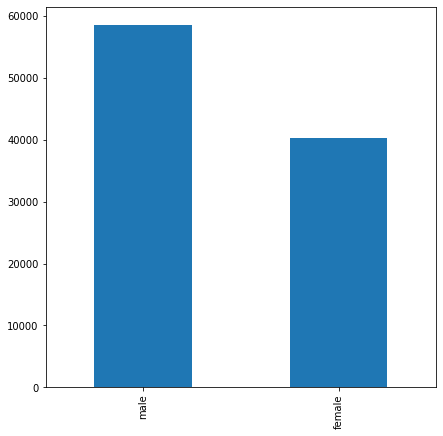

In [8]:
plt.figure(figsize=(7,7))
data['gender'].value_counts().plot.bar(label=True)     ##plotting bar chart

* We have 58,574 (i.e. 59.16%) males and only 40,254 (i.e. 40.66%) females and we don't have any other column (eg: Name) from which we can identify the gender of users.                    

* As we have also checked that in gender column, null (missing) values in raw data are only present in 175 rows (i.e. 0.17%) out of total 99003 rows, which will not have significant impact on the Model. 

* Hence, we can impute the missing values with mode (>50% or highest occuring value) of gender column i.e. "male" (59.16%)

In [9]:
data['gender'] = data['gender'].fillna('male')        ##imputing missing values with mode value of gender column

● Replace the null values (NA) of tenure column (numerical variable) with its median,
and explain why mode/median used to replace NA values

In [10]:
data['tenure'].isnull().sum()

2

In [11]:
data['tenure'].mean(), data['tenure'].median()       ## checking the skewness with the help of median and mean value of tenure column

(537.8873748750012, 412.0)

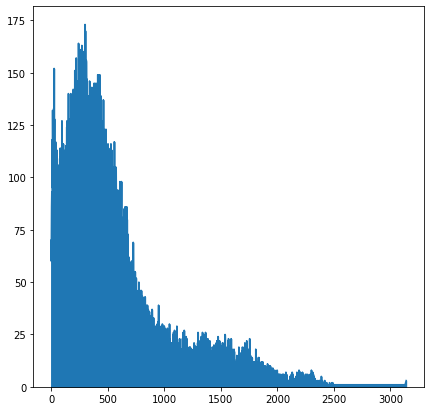

In [12]:
plt.figure(figsize=(7,7))
data['tenure'].value_counts().sort_index().plot.area()    ## plotting 

* To identify the distribution of the tenure column, I calculated mean (537.89) and median (412) which shows that mean > median. It means that the distribution is a positively skewed. And which is shown with the help of plotting above. 
* If we impute missing values of positively skewed data with mean, then outliers will increase the biasness of mean which will have the bad impact on model.
* As we have also checked that in tenure column, null (missing) values in raw data are only present in 2 rows (i.e. 0.002%) out of total 99003 rows, which will not have significant impact on the Model.
* That's why, I have imputed the missing values with median of gender column i.e. 412.

In [13]:
data['tenure'] = data['tenure'].fillna(data['tenure'].median())     ## imputing missing values with meidan of tenure column

# 2) Plot heatmap / correlation matrix on all the columns.

In [14]:
dm1 = pd.get_dummies(data['gender'], prefix='gender')
data.drop(columns='gender', axis=1, inplace=True)
data = pd.concat([data,dm1], axis=1) 

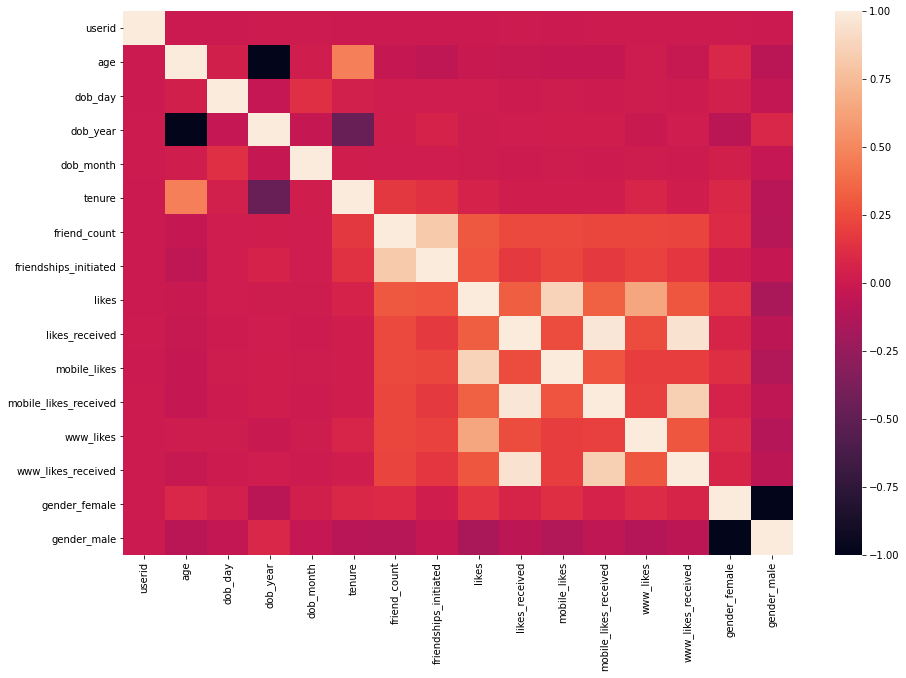

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())

# 3) Analysis based on gender of the users.

● What is composition of male and female users?

There are 146 males on every 100 females i.e. 15 males (approx): 10 females = 3:2 . 

In [16]:
data = pd.read_csv('facebook_user_data.csv')    ## reading csv file again we want to do analysis on raw data 

In [17]:
round((data['gender'].value_counts()[0]/data['gender'].value_counts()[1])*100)   ## calculating no. of males on 100 females

146

● Which category of gender has more friends ?            


Ans: Female cateogory has more friends

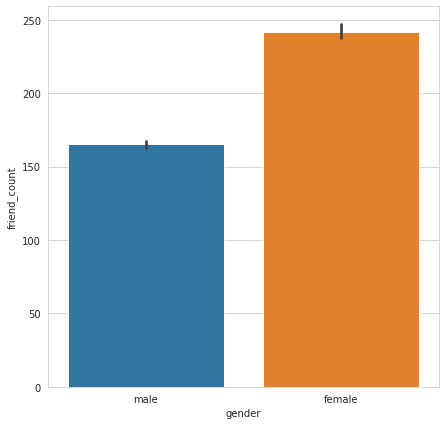

In [18]:
plt.figure(figsize=(7,7))                                       ## increasing th figure size for good visibility
sns.set_style('whitegrid')
sns.barplot(x=data['gender'], y=data['friend_count'])           ## plotting bar chart

● Which category of gender initiated more friendships?


Ans: More frienships are initiated by ***Female*** category as compared to male category.

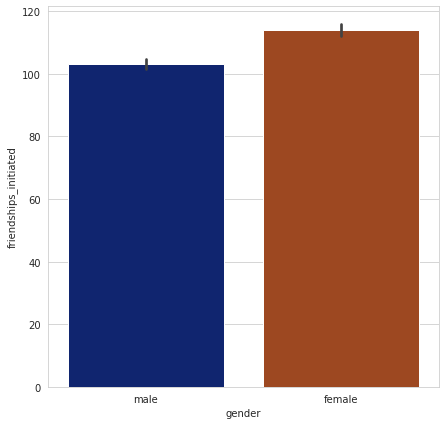

In [19]:
plt.figure(figsize=(7,7))                                             ## increasing th figure size for good visibility
sns.set_style('whitegrid')
sns.barplot(x=data['gender'], y=data['friendships_initiated'], palette='dark')        ## plotting bar chart

● What is the distribution of tenure across different categories of gender?

<Figure size 504x504 with 0 Axes>

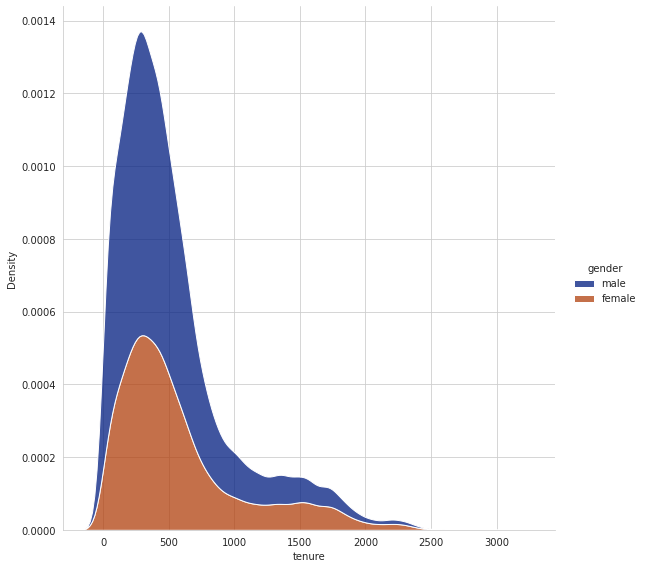

In [20]:
plt.figure(figsize=(7,7))                                                          ## increasing th figure size for good visibility
sns.set_style('whitegrid')
sns.displot( data, x='tenure', hue='gender', kind="kde", multiple="stack", palette='dark', height=8)         ## plotting the distribution of tenure column

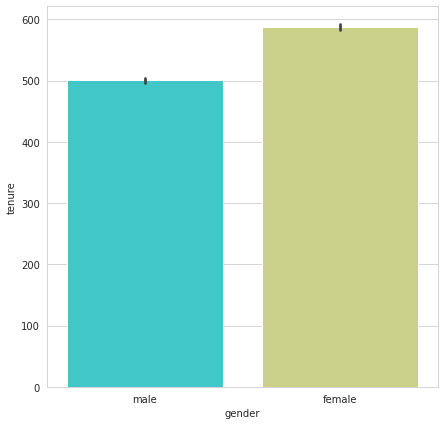

In [21]:
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.barplot(data=data, x="gender", y="tenure", palette='rainbow')

#4) Analysis based on the least active users on Facebook  

        
● How many users have no friends?                        



Ans: 1962 (i.e.only 1.98 %) users out of 99,003 users have no friends.

In [22]:
print(sum(data['friend_count']==0))        ## users having zero friends
(sum(data['friend_count']==0)/99003)*100   ## calculate percent of users having zero friends

1962


1.9817581285415595

● How many users did not like any posts?                      


Ans: 22,308  (i.e. 22.53 %) users out of 99,003 users did not like any posts

In [23]:
print(sum(data['likes']==0))          ## users did not like any posts
(sum(data['likes']==0)/99003)*100     ## percent of users did not like any posts

22308


22.532650525741644

● How many users did not receive any likes?

Ans: 24,428 (i.e. 24.67 %) users out of 99,003 users did not receive any likes.

In [24]:
print(sum(data['likes_received']==0))          ## users that did not recieve any likes
(sum(data['likes_received']==0)/99003)*100     ## percent of users did not receive any likes

24428


24.673999777784513

# 5) Analysis based on the user accessibility (Mobile Devices vs. Web Devices)

● What is the average number of posts liked by users (based on gender) through web vs mobile devices?


Ans: On an average, 
* Through Web: a) A male liked 24 (i.e. 24.42) posts.                       
 b) A female liked 87 (i.e. 87.13) posts.



* Through Mobile:  a) A male liked 60 (i.e. 60.26) posts.                   
 b) A female liked 173 (i.e. 172.91 ) posts.



In [25]:
pd.DataFrame(data.groupby(['gender']).agg({'www_likes':'mean'}).iloc[1,:])     ## calculating avg no. of posts liked by males thorugh web

,male
www_likes,24.41655


In [26]:
pd.DataFrame(data.groupby(['gender']).agg({'mobile_likes':'mean'}).iloc[1,:])   ## calculating avg no. of posts liked by males through mobile

,male
mobile_likes,60.261328


**********************************************************************************************

In [27]:
pd.DataFrame(data.groupby(['gender']).agg({'www_likes':'mean'}).iloc[0,:])       ## calculating avg no. of posts liked by females through web

,female
www_likes,87.138297


In [28]:
pd.DataFrame(data.groupby(['gender']).agg({'mobile_likes':'mean'}).iloc[0,:])    ## calculating avg no. of posts liked by females through mobile

,female
mobile_likes,172.912928


● What is the average number of likes received by users (based on gender) through web vs mobile devices?

Ans:  On an average, 
* Through Web: a) A male received 27 (i.e. 27.07) likes.                       
 b) A female received 104 (i.e. 104.33) likes.



* Through Mobile:  a) A male received 41 (i.e. 40.83) likes.                   
 b) A female received 147 (i.e. 147.10 ) likes.


In [29]:
pd.DataFrame(data.groupby(['gender']).agg({'www_likes_received':'mean'}).iloc[1,:])        ## calculating avg no. of likes received by males through web

,male
www_likes_received,27.078533


In [30]:
pd.DataFrame(data.groupby(['gender']).agg({'mobile_likes_received':'mean'}).iloc[1,:])     ## calculating avg no. of likes received by males through mobile

,male
mobile_likes_received,40.833015


**************************************************************************************

In [31]:
pd.DataFrame(data.groupby(['gender']).agg({'www_likes_received':'mean'}).iloc[0,:])        ## calculating avg no. of likes received by females through web

,female
www_likes_received,104.334451


In [32]:
pd.DataFrame(data.groupby(['gender']).agg({'mobile_likes_received':'mean'}).iloc[0,:])     ## calculating avg no. of likes received by females through mobile

,female
mobile_likes_received,147.100884
